In [333]:
import numpy.linalg as la

import scipy.sparse.linalg as spla

import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
from time import time

np.set_printoptions(edgeitems=7,precision=3) # 3 знако после запятой, 7 элементов в матрице по краям до многоточий
np.core.arrayprint._line_width = 200 # широкие строки в браузере для широкого экрана

n=1000
%matplotlib notebook


In [334]:
A=sp.dok_matrix((n,n))
num = n*20
ts = time()
for k in range(num):
    i=np.random.randint(n)
    j=np.random.randint(n)
    A[i,j]=1;
    A[j,i]=1;
    

for i in range(n): A[i,i]=5
    
print( (time()-ts)*1000 / A.nnz )

    


0.007493426817114567


In [335]:
if n<100: A.toarray() 

In [336]:
A.nnz

40148

<IPython.core.display.Javascript object>


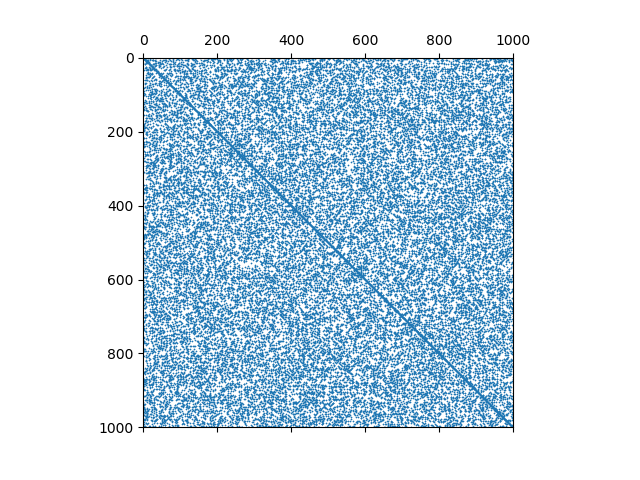

In [337]:
plt.spy(A,markersize=0.3)

In [354]:
x_exact=np.random.rand(n)


In [355]:
b=A@x_exact

In [356]:
%time la.norm( spla.spsolve(A,b)-x_exact )




Wall time: 123 ms


d:\Anaconda\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


4.2145831792065376e-12

In [357]:
%time A1=A.tocsr()
%time la.norm( spla.spsolve(A1,b)-x_exact )

Wall time: 0 ns
Wall time: 131 ms


2.6996355675936254e-12

In [358]:
A1.data

array([ 5.,  1.,  1.,  1.,  1.,  1.,  1., ...,  1.,  1.,  1.,  1.,  1.,  1.,  5.])

In [359]:
A1.indices

array([  0,  13,  59,  60, 123, 188, 190, ..., 879, 907, 932, 967, 973, 996, 999], dtype=int32)

In [360]:
A1.indptr

array([    0,    39,    74,   121,   164,   207,   254, ..., 39907, 39947, 39989, 40030, 40065, 40107, 40148], dtype=int32)

In [361]:
x,info=spla.cg(A1,b,tol=1e-8,maxiter=1000)

In [362]:
x-x_exact

array([  2.360e-02,   8.158e-03,  -2.241e-03,   5.807e-02,   2.462e-02,  -1.897e-02,   2.962e-03,  -3.746e-02,  -2.543e-02,   1.454e-02,  -2.102e-02,   4.117e-03,   7.646e-02,  -5.380e-02,
         5.548e-02,   5.143e-03,   3.017e-02,   6.355e-02,   1.413e-02,   7.558e-04,   1.265e-02,  -1.286e-02,  -9.146e-03,  -6.422e-02,   6.730e-03,  -3.953e-02,   3.884e-02,  -3.441e-02,
        -3.628e-02,  -4.889e-02,  -3.361e-02,   3.937e-02,  -3.228e-03,   4.579e-03,  -1.372e-02,  -3.953e-02,   4.107e-03,  -3.445e-02,   7.375e-02,  -2.395e-02,  -6.128e-03,   3.938e-02,
         2.744e-02,  -2.973e-03,   1.565e-02,  -2.739e-02,   5.032e-02,   3.331e-02,   1.226e-02,   4.013e-02,   3.458e-02,  -4.287e-03,   4.226e-02,   1.543e-02,   3.393e-02,  -3.708e-02,
         1.576e-03,   3.325e-02,   3.209e-02,   1.673e-02,   3.115e-02,  -8.766e-02,  -3.507e-02,   3.718e-02,   1.191e-02,   3.871e-02,   1.315e-02,   2.524e-02,   9.688e-03,  -3.064e-02,
         4.260e-02,  -1.336e-02,  -6.112e-02,  -2.726e-

In [363]:
info

1000

In [364]:
def ff(x):
    print(la.norm(A1.dot(x)-b)/la.norm(b))

In [372]:
%time x1,info= spla.cg(A1,b,tol=1e-8, callback=ff)

0.0838856121733
0.0547539842857
0.140655521781
0.0271249062943
0.034545645867
0.0474289510757
0.0170948243135
0.0394990004009
0.0217469244738
0.0136053368549
0.0752469619307
0.0142177354984
0.0131366352633
0.0457962510315
0.00939982506879
0.0149983459148
0.0165246778445
0.00778757887634
0.0210926492907
0.0149417581027
0.00944054348217
0.00807159341014
0.029521441165
0.00599264329117
0.00961473682673
0.0100024233961
0.00551298132196
0.0210200816195
0.00628332840297
0.00540053057847
0.0526099158077
0.00490093871341
0.00647447272473
0.0129707590869
0.00432346045626
0.00833968393027
0.00652120468436
0.00404619781427
0.0300125502215
0.00456231943269
0.00585719713107
0.00590601574896
0.00808011393215
0.00335388884015
0.00827205849085
0.00470797765836
0.00335005684976
0.0313167959855
0.00362204496519
0.00421070331906
0.010637170634
0.00293858769764
0.00492160043423
0.00521911573011
0.00270904817171
0.00790357724385
0.00357647757372
0.00271603607374
0.079784296082
0.00270032928104
0.0037048672

0.000206446250367
0.00387629332505
0.000245073422633
0.000426921436991
0.000457176095357
0.000227049931048
0.000973176031294
0.000266325127434
0.000170087670504
0.00030753487424
0.000414580346927
0.000241412222313
0.000888155842989
0.000419081024114
0.000336446678997
0.000317035439733
0.000603093406917
0.000206963810079
0.000223110342368
0.00531881486243
0.000250618889012
0.000340030627033
0.000558037045271
0.000219239421124
0.00070760155323
0.000293894142293
0.000220848416153
0.00321183300877
0.000268706743786
0.000272230212524
0.000214399227894
0.000934409076503
0.000294126021398
0.000279550316319
0.0011883881042
0.000199463787421
0.00042547568747
0.000367286023012
0.000227961840638
0.000868957011115
0.000336049036213
0.0002729245456
0.00168957362261
0.000306643767199
0.000388588276132
0.000314896345383
0.000936373505275
0.000226196886891
0.000253714907257
0.000978958141166
0.00025872182183
0.000293438356328
0.00348717886793
0.000321710370851
0.000638662974443
0.000416191113424
0.000

In [373]:
la.norm(x1-x_exact)

1.9931670773914839e-06